In [1]:
import numpy as np
from numpy import random as r
from matplotlib import pyplot as plt

In [2]:
sigma = 10
theta = sigma/200
me = 9.10938e-31
c = 3e8
kb = 1.38064852e-23
# theta = kb T / ( m * c**2 )
# T = theta * m * c**2 / kb 
T = theta*me*c**2/kb

In [3]:
def sobol(n):
    u = np.zeros(n)
    for i in range(u.size):
        eta = 0
        while eta**2 - u[i]**2 <= 1:
            x4 = r.rand()                
            x5 = r.rand()                 
            x6 = r.rand()
            u[i] = -T * np.log(x4*x5*x6)     
            x7 = r.rand()                 
            eta = -T * np.log(x4*x5*x6*x7)
    return(u)
def f(u):
    return(np.e**(-(np.sqrt(1+u**2)/T))*u**2)

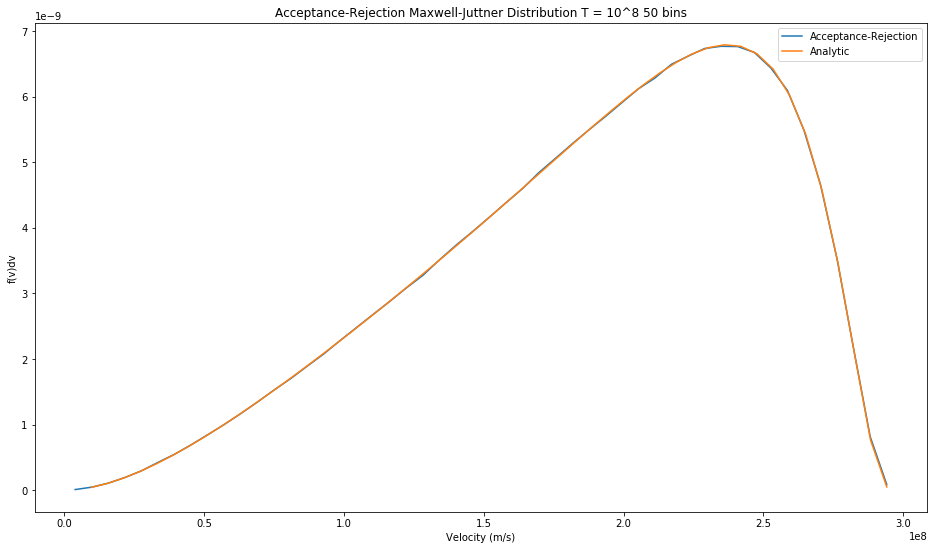

In [18]:
T = 10**8 #Temperature
n = 5*10**6 #Number of initialized velocities
b = 50 #Histogram Bins
us = sobol(n) #Initialized Velocities
vs = us/np.sqrt(1+us**2/c**2) #Convert u values to v values
cmjd,v1 = np.histogram(vs,bins=b,density=True) #Create a histogram sampling f(v)dv
for i in range(v1.size-1): #This loop finds the midpoint of each bin
    v1[i] =+(v1[i+1]+v1[i])/2
    i += 1
v1 = v1[0:v1.size-1] #The last value of v1 is not a midpoint
v2 = np.arange(min(v1)+(max(v1)-min(v1))/b,max(v1)+(max(v1)-min(v1))/b,(max(v1)-min(v1))/b) #The domain of the analytic f(v)dv is equal to that of the computational f(v)dv 
amjd = f(v2/np.sqrt(1-v2**2/c**2))/np.sqrt(1-v2**2/c**2)**3
#The python function f(u) is a function of u = 1/sqrt(1-v**2/c**2) v**2 and is mathematically equivalent to f(u)du
#We can show that du = gamma**3 dv We multiply by this factor and convert u to v, such that our input looks like f( v/sqrt(1-v**2/c**2) ) * 1/sqrt(1-v**2/c**2)**3
amjd *= 1/(sum(amjd)*(v2[1]-v2[0])) #Normalize the integral of the analytic distribution to be equal to that of the computational distribution.
plt.plot(v1,cmjd); plt.plot(v2,amjd)

plt.title('Acceptance-Rejection Maxwell-Juttner Distribution T = 10^8 50 bins')
plt.gca().set_xlabel('Velocity (m/s)')
plt.gca().set_ylabel('f(v)dv')
plt.gcf().set_facecolor('white')
plt.legend(('Acceptance-Rejection','Analytic'))
plt.gcf().set_size_inches(16,9)

In [446]:
def fxBoost(ux,beta):
    return((np.sqrt(1+ux**2)/T + 1 - beta*ux)*np.e**(-np.sqrt(1+ux**2)/T))
def fxPrimeBoost(ux,beta):
    return((np.sqrt((1+ux**2)/(1-beta**2))+T)*np.e**(-(np.sqrt(1+ux**2)-beta*ux)/np.sqrt(1-beta**2)/T))
def sobolxBoost(n,beta):
    u = np.zeros(n)
    for i in range(u.size):
        eta = 0
        x8 = 1
        omega = 0
        while omega <= x8:
            while eta**2 - u[i]**2 <= 1:
                x4 = r.rand()                
                x5 = r.rand()                 
                x6 = r.rand()
                u[i] = -T * np.log(x4*x5*x6)     
                x7 = r.rand()                 
                eta = -T * np.log(x4*x5*x6*x7)
            x1 = r.rand()
            u[i] = u[i] * (2*x1 - 1)
            omega = (1+beta*u[i]/(np.sqrt(1+u[i]**2)))/2
            x8 = r.rand()
            #omega = 1
            #x8 = 0
    return(u)

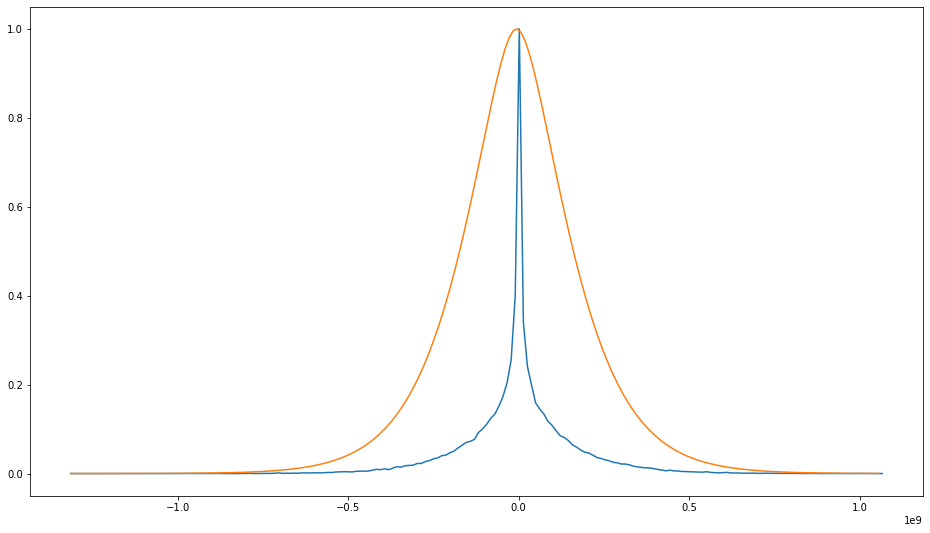

In [451]:
T = 10**8
beta = 0.0
n = 10**5
b = 200
us = sobolxBoost(n,beta)
cmjd, u1 = np.histogram(us, bins = b, density = True)
for i in range(u1.size-1):
    u1[i] = (u1[i+1] + u1[i])/2
u1 = u1[0:u1.size-1]
cmjd = cmjd/max(cmjd)    
plt.plot(u1,cmjd)
u2 = np.arange(min(u1),max(u1),(max(u1)-min(u1))/b)
amjd = fxPrimeBoost(u1,beta)
#amjd = amjd/(sum(amjd)*(u2[1]-u2[0]))
amjd = amjd/max(amjd)
plt.plot(u2,amjd)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(16,9)

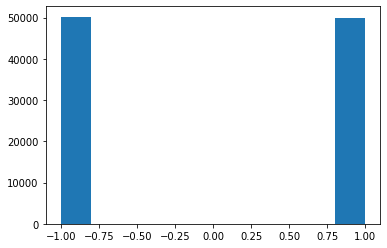

In [448]:
us = us/abs(us)
plt.hist(us)
plt.gcf().set_facecolor('white')